# Which features impact the following

'strength_gains','avg_sleep_scr','avg_rest_hrt','heart_rate_variation','WeightPounds','waist_msr'

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm

In [2]:
daily_activity = pd.read_csv("Fitness  Data\dailyActivity_merged.csv")
sleep_activity_daily = pd.read_csv("Fitness  Data\sleepDay_merged.csv")
weight_log = pd.read_csv("Fitness  Data\weightLogInfo_merged.csv")
heart_rate = pd.read_csv("Fitness  Data\heartrate_seconds_merged.csv")

In [3]:
len(daily_activity.Id.unique())

33

In [4]:
daily_activity.index = pd.to_datetime(daily_activity['ActivityDate'])

In [5]:
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])

In [6]:
daily_activity.rename(columns={'ActivityDate':'Date'},inplace=True)

In [7]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 940 entries, 2016-04-12 to 2016-05-12
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   Date                      940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  Lig

In [8]:
sleep_activity_daily.index = pd.to_datetime(sleep_activity_daily['SleepDay'])
sleep_activity_daily['SleepDay'] = pd.to_datetime(sleep_activity_daily['SleepDay'])

In [9]:
sleep_activity_daily.rename(columns={'SleepDay':'Date'},inplace=True)

In [10]:
sleep_activity_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 413 entries, 2016-04-12 to 2016-05-04
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   Date                413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 19.4 KB


In [11]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [12]:
weight_log.index = pd.to_datetime(weight_log['Date']).dt.date
weight_log['Date'] =  pd.to_datetime(weight_log['Date']).dt.date

In [13]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
Date,,,,,,,,
2016-05-02,1503960366,2016-05-02,52.599998,115.963147,22.0,22.650000,True,1462233599000
2016-05-03,1503960366,2016-05-03,52.599998,115.963147,NaN,22.650000,True,1462319999000
2016-04-13,1927972279,2016-04-13,133.500000,294.317120,NaN,47.540001,False,1460509732000
2016-04-21,2873212765,2016-04-21,56.700001,125.002104,NaN,21.450001,True,1461283199000
2016-05-12,2873212765,2016-05-12,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [14]:
weight_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 2016-05-02 to 2016-05-12
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 4.3+ KB


In [15]:
heart_rate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [16]:
heart_rate.rename(columns={'Time':'Date'},inplace=True)

In [17]:
heart_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Date    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [18]:
dataframes = [
daily_activity, 
sleep_activity_daily, 
weight_log,
heart_rate
]
num_of_ids = []

for i in dataframes:
    num_of_ids.append(len(i['Id'].unique()))
print(num_of_ids)    

[33, 24, 8, 14]


In [19]:
print(daily_activity['Id'].dtype)
print(daily_activity['Date'].dtype)

int64
datetime64[ns]


In [20]:
print(sleep_activity_daily['Id'].dtype)
print(sleep_activity_daily['Date'].dtype)

int64
datetime64[ns]


In [21]:
daily_activity_and_sleep = pd.merge(daily_activity,sleep_activity_daily, on=['Id','Date'])

In [22]:
daily_activity_and_sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        413 non-null    int64         
 1   Date                      413 non-null    datetime64[ns]
 2   TotalSteps                413 non-null    int64         
 3   TotalDistance             413 non-null    float64       
 4   TrackerDistance           413 non-null    float64       
 5   LoggedActivitiesDistance  413 non-null    float64       
 6   VeryActiveDistance        413 non-null    float64       
 7   ModeratelyActiveDistance  413 non-null    float64       
 8   LightActiveDistance       413 non-null    float64       
 9   SedentaryActiveDistance   413 non-null    float64       
 10  VeryActiveMinutes         413 non-null    int64         
 11  FairlyActiveMinutes       413 non-null    int64         
 12  LightlyActiveMinutes  

In [23]:
users_mean_metrics = daily_activity_and_sleep.groupby("Id")

In [24]:
daily_activity_and_sleep.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712


In [25]:
heatmap_features = ['TotalDistance','TotalSteps','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories','TotalSleepRecords','TotalMinutesAsleep']

In [26]:
new_features = ['TotalSteps','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance','VeryActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories','TotalMinutesAsleep']

<Axes: >

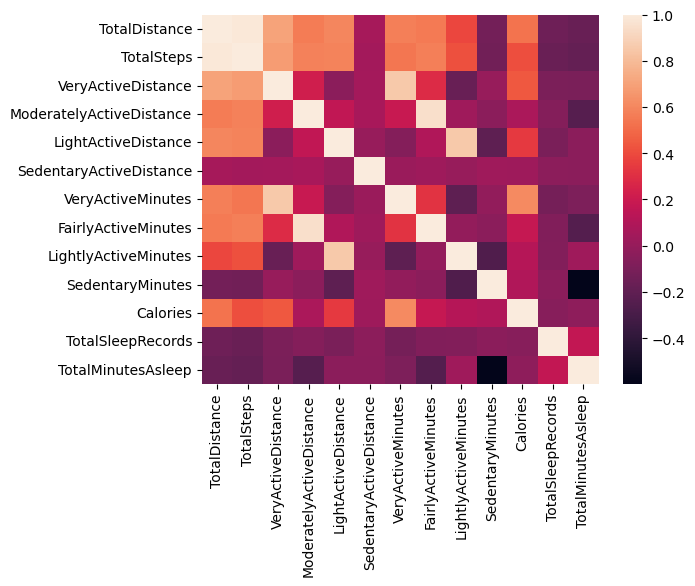

In [27]:
sns.heatmap(daily_activity_and_sleep[heatmap_features].corr())

<Axes: >

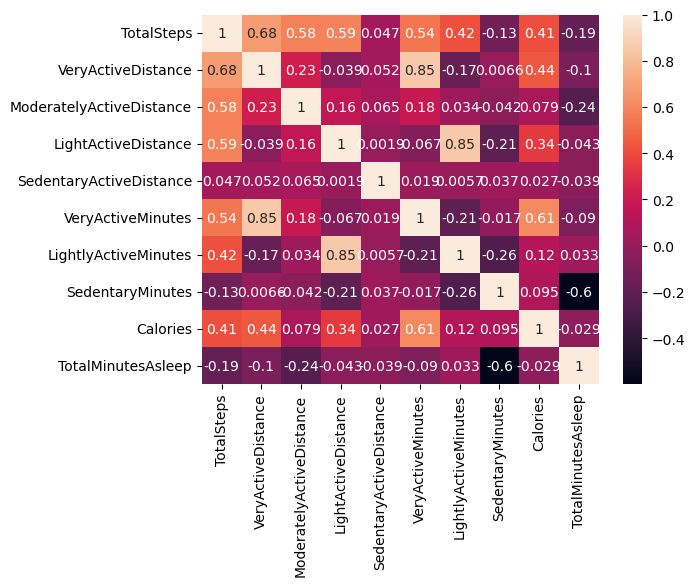

In [28]:
sns.heatmap(daily_activity_and_sleep[new_features].corr(),annot=True)

In [29]:
new_features2 = ['TotalSteps','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance','VeryActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories','TotalMinutesAsleep']

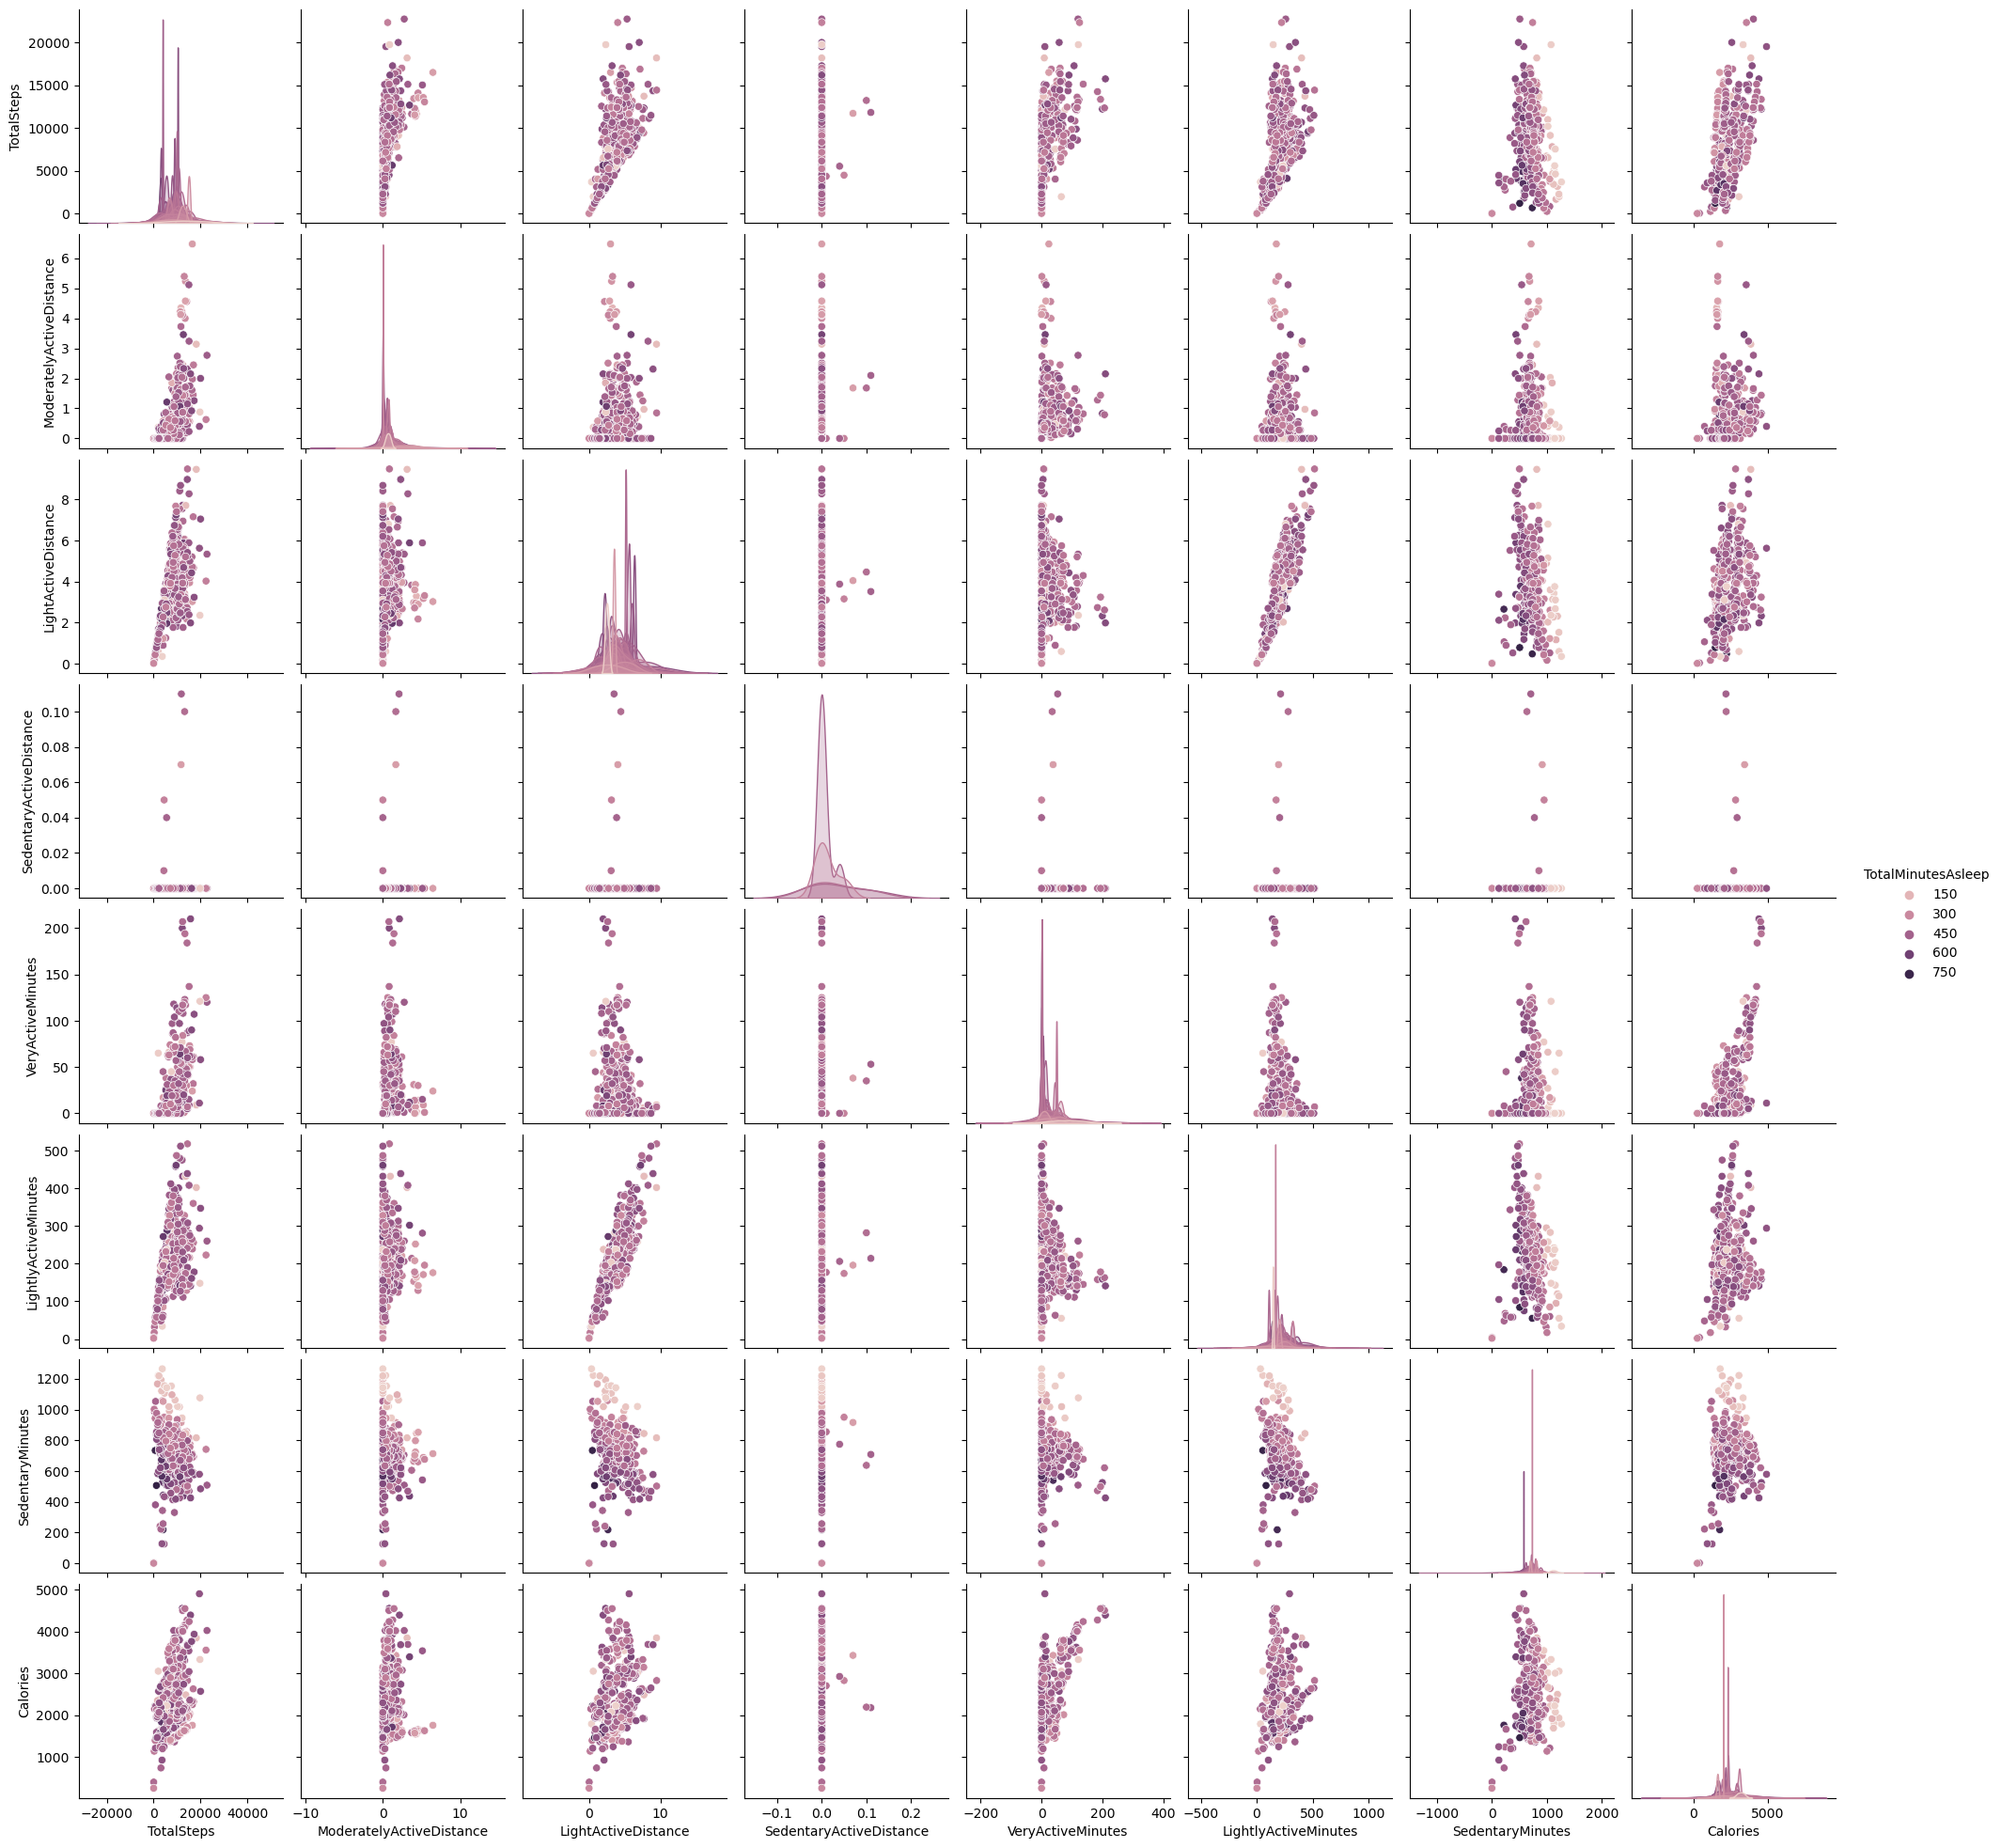

In [30]:
sns.pairplot(daily_activity_and_sleep[new_features2],hue='TotalMinutesAsleep')


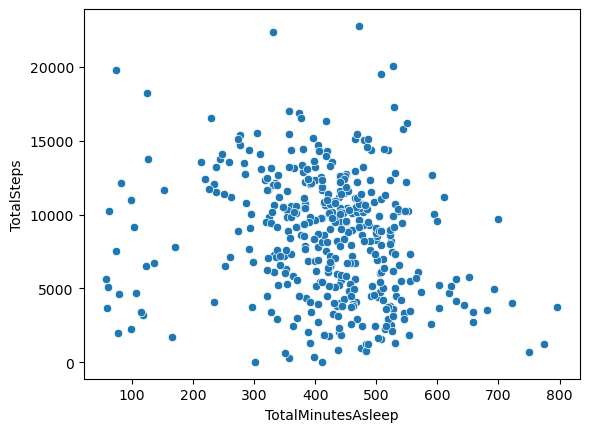

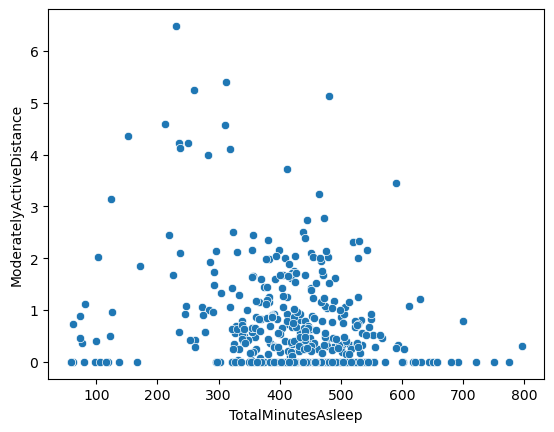

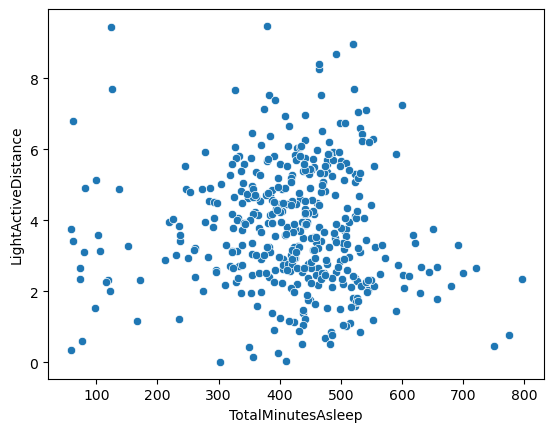

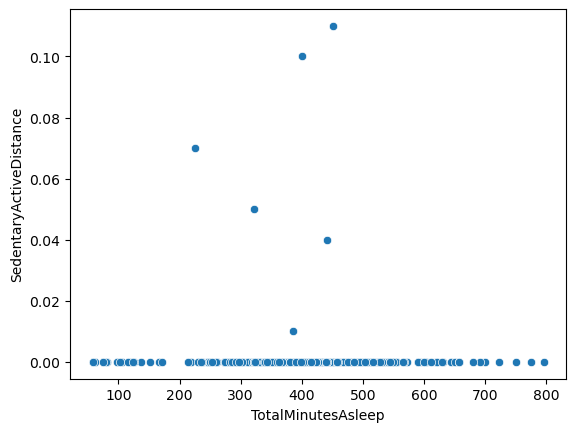

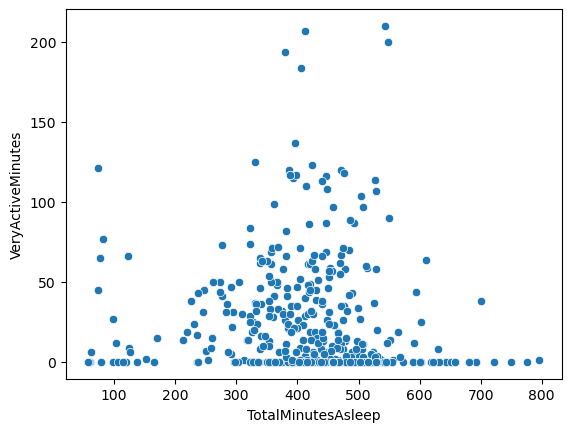

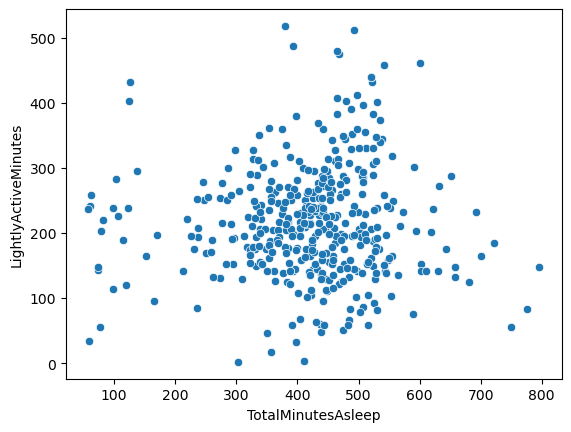

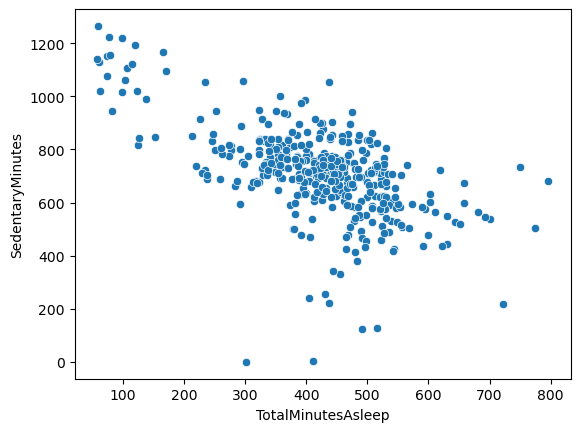

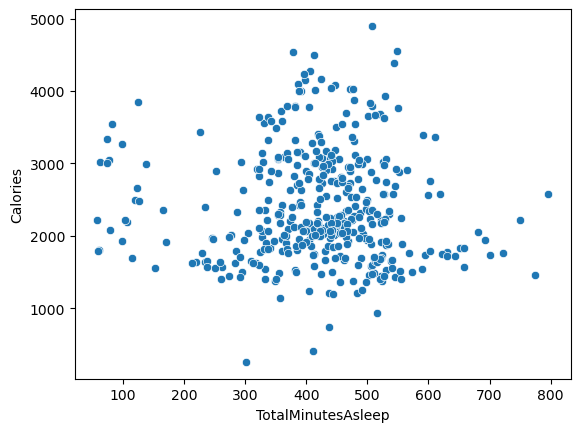

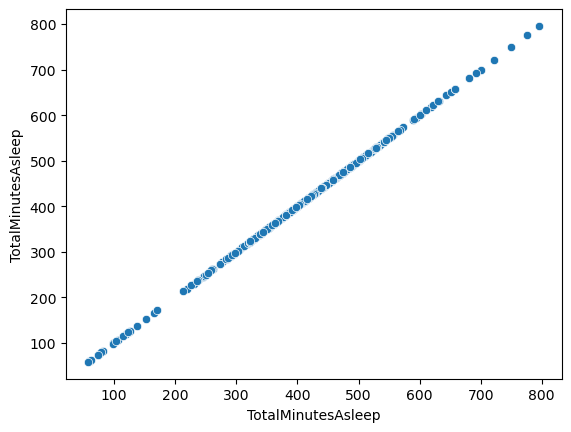

In [31]:
for i in new_features2:
    sns.scatterplot(data=daily_activity_and_sleep,x='TotalMinutesAsleep',y=i)
    plt.show()

In [32]:
ids = daily_activity_and_sleep['Id'].unique()
count = 1
id_map = {}
for i in ids:
    id_map[i] = count
    count +=1
    
daily_activity_and_sleep['Id'] = daily_activity_and_sleep['Id'].map(id_map)

In [33]:
daily_activity_and_sleep.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712


In [34]:
daily_activity_and_sleep.Id.value_counts()


counts = daily_activity_and_sleep['Id'].value_counts()

# Find 'client_ID's that occur more than 15 times
client_ids_to_keep = counts[counts >= 15].index

# Filter the DataFrame to keep only those rows
daily_activity_and_sleep = daily_activity_and_sleep[daily_activity_and_sleep['Id'].isin(client_ids_to_keep)]

In [35]:
daily_activity_and_sleep.drop(['TrackerDistance','VeryActiveDistance'],axis=1,inplace=True)

C:\Users\mainf\AppData\Local\Temp\ipykernel_968\879573231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_activity_and_sleep.drop(['TrackerDistance','VeryActiveDistance'],axis=1,inplace=True)


In [36]:
daily_activity_and_sleep.columns

Index(['Id', 'Date', 'TotalSteps', 'TotalDistance', 'LoggedActivitiesDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed'],
      dtype='object')

In [37]:
feature_hists = ['TotalSteps','TotalDistance','SedentaryMinutes','TotalTimeInBed','Calories',\
                 'LightlyActiveMinutes','TotalMinutesAsleep','VeryActiveMinutes'
]

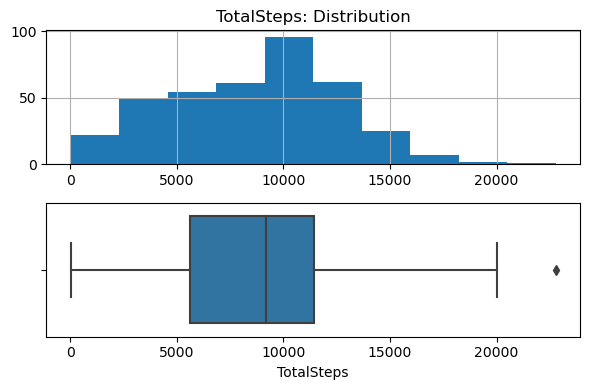

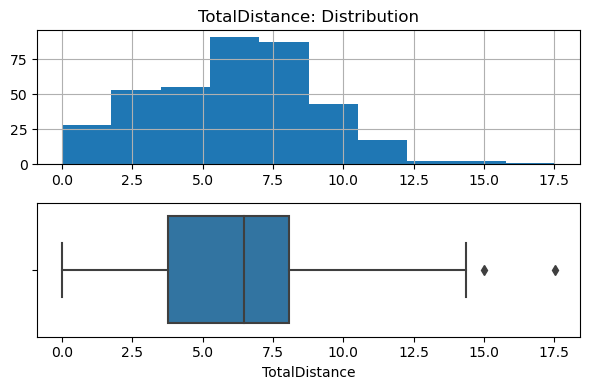

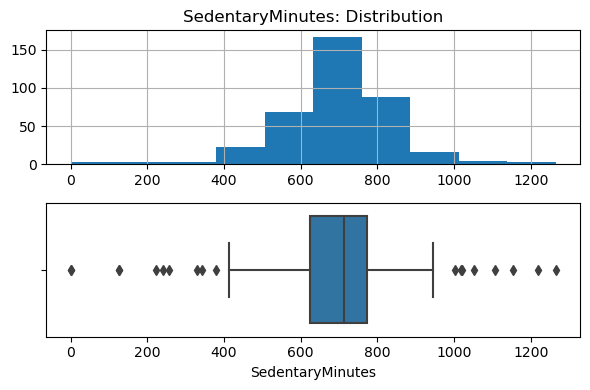

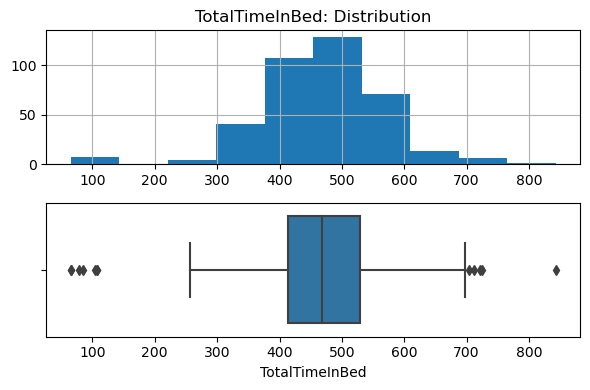

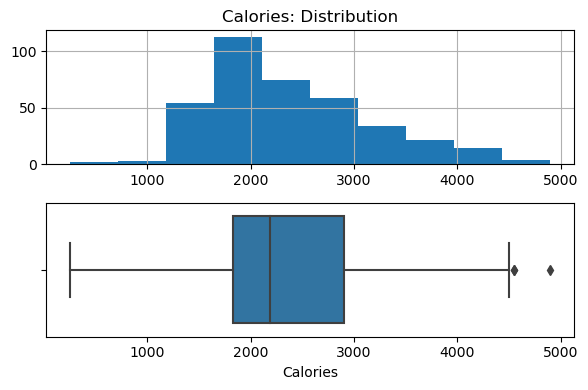

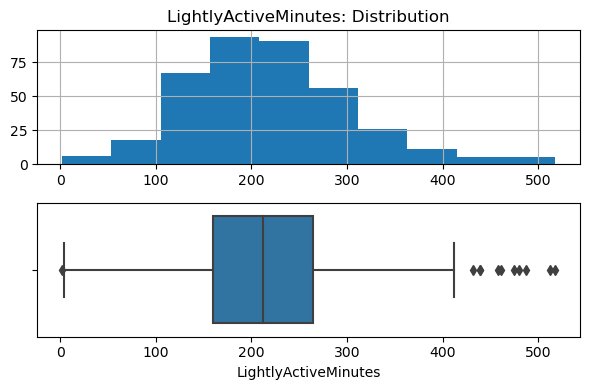

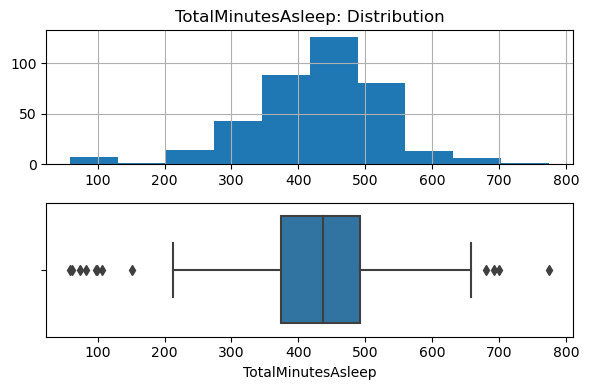

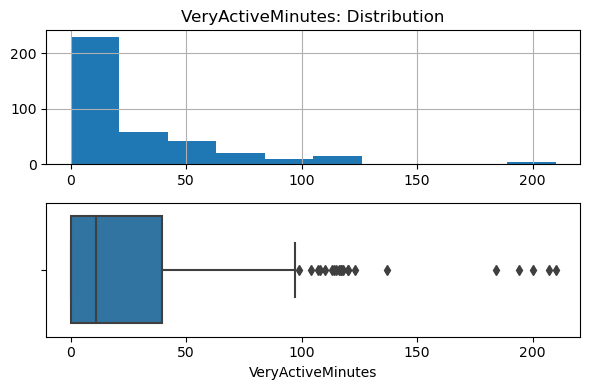

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in feature_hists:
    # Create a figure with two subplots (rows), one column
    fig, axes = plt.subplots(2, 1, figsize=(6, 4))

    # Histogram in the first subplot
    daily_activity_and_sleep[feature].hist(ax=axes[0])
    axes[0].set_title(f'{feature}: Distribution')

    # Boxplot in the second subplot
    sns.boxplot(x=daily_activity_and_sleep[feature], ax=axes[1])

    # Display the plots
    plt.tight_layout()
    plt.show()

    


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold




In [40]:
X = np.array(daily_activity_and_sleep.drop(['Id','Date','TotalTimeInBed','TotalMinutesAsleep'],axis=1))
y = daily_activity_and_sleep['TotalTimeInBed'].values

minmax_scaler = MinMaxScaler()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_scaled = minmax_scaler.fit_transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

In [41]:
lrmodel = LinearRegression()

lrmodel.fit(X_train_scaled,y_train)

LinearRegression()

In [42]:
y_preds = lrmodel.predict(X_test_scaled)

r2_score(y_preds,y_test)

-0.7067734873902984

In [43]:
from sklearn.ensemble import RandomForestRegressor


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


rf_regressor.fit(X_train_scaled, y_train)


y_pred = rf_regressor.predict(X_test_scaled)


from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

Mean Squared Error: 4473.165606140352
R-squared: 0.4390402444736453
RMSE: 66.8817284924691


In [44]:
"C:\Users\mainf\OneDrive\Desktop"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2128593819.py, line 1)

In [ ]:
column_names = ['body_weight','strength_gains','waist_msr','Calories','avg_sleep_scr','TotalMinutesAsleep','avg_rest_hrt','avg_heart_rate','heart_rate_variation', 'protein','stress_analysis','client_ID','date','total_steps']
my_df = pd.DataFrame(columns=column_names)

In [ ]:
my_df.head()

In [ ]:
my_df['date'] = daily_activity_and_sleep['Date']
my_df['total_steps'] = daily_activity_and_sleep['TotalSteps']
my_df['TotalMinutesAsleep'] = daily_activity_and_sleep['TotalMinutesAsleep']
my_df['client_ID'] = daily_activity_and_sleep['Id']
my_df['Calories'] = daily_activity_and_sleep['Calories']

In [ ]:
my_df.info()

In [ ]:
daily_activity_and_sleep.index

In [ ]:
my_df['date'] = pd.to_datetime(my_df['date'])
weight_log['Date'] = pd.to_datetime(weight_log['Date'])

In [ ]:
# Reset the index and drop the 'Date' index if it exists
if 'Date' in weight_log.index.names:
    weight_log = weight_log.reset_index(drop=True)

# Perform the merge
my_df = my_df.merge(weight_log, left_on=['client_ID', 'date'], right_on=['Id', 'Date'], how='left')


In [ ]:
my_df.info()

In [ ]:
my_df.drop(columns=['WeightKg','Fat','BMI','IsManualReport','LogId','Date'],inplace=True)


In [ ]:
my_df.head()

In [ ]:
size = len(my_df)  # number of samples
alpha = 4  # Positive value for right skew
loc = 0.1  # Location (mean)
scale = 1  # Scale (standard deviation)

# Generate skewed normal distributed values
strength_changes = skewnorm.rvs(alpha, loc, scale, size=size)

# Plot the distribution
plt.hist(strength_changes, bins=30, edgecolor='black')
plt.xlabel('Strength Change')
plt.ylabel('Frequency')
plt.title('Synthetic Sample of Strength Changes')
plt.show()

# Example output
print(strength_changes[:10])  # Print first 10 samples

my_df['strength_gains'] = strength_changes

In [ ]:
heart_rate.head()

In [ ]:
len(heart_rate['Id'].unique())

daily_avg_heart_rate = pd.DataFrame(daily_avg_heart_rate)

daily_avg_heart_rate.head()

daily_avg_heart_rate.index.name = 'date'

daily_avg_heart_rate = daily_avg_heart_rate.reset_index(level=0, drop=True)

daily_avg_heart_rate.head()

import pickle
with open('daily_avg_hr.pkl','wb') as file:
    pickle.dump(daily_avg_heart_rate,file)

In [ ]:
import pickle
with open('daily_avg_hr.pkl', 'rb') as file:
    # Load the DataFrame from the pickle file
    daily_avg_heart_rate = pickle.load(file)

daily_avg_heart_rate.head()

In [ ]:
new_df = my_df.merge(daily_avg_heart_rate,how='left', left_on=['client_ID', 'date'], right_on=['Id', 'Date'])

In [ ]:
new_df.Value.isna().sum()

In [ ]:
new_df.Value.hist()

In [ ]:
filtered_df = new_df[new_df['Value'].notnull()]

# Count unique client_IDs
unique_client_ids_count = filtered_df['client_ID'].nunique()

print(f"Number of client_IDs with a value for avg heart rate: {unique_client_ids_count}")


In [ ]:
new_df['avg_heart_rate'] = new_df['Value']

In [ ]:
new_df.drop(columns=['Id_y','Id_x','Value','body_weight'],axis=1,inplace=True)


In [ ]:
new_df.head()

In [ ]:
features_to_predict = ['strength_gains','avg_sleep_scr','avg_rest_hrt','heart_rate_variation','WeightPounds','waist_msr']

In [ ]:
new_df.info()

In [ ]:
dashboard_df = new_df[['total_steps','date','client_ID','avg_heart_rate','TotalMinutesAsleep','Calories','strength_gains']]

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Example DataFrame
# dashboard_df = ...

# Separating numerical and non-numerical (e.g., datetime) columns
numerical_df = dashboard_df.select_dtypes(include=['int64', 'float64'])
non_numerical_df = dashboard_df.select_dtypes(exclude=['int64', 'float64'])

# Perform KNN Imputation on numerical data
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(numerical_df)
imputed_df = pd.DataFrame(imputed_data, columns=numerical_df.columns)

# Reintegrate the non-numerical data
dashboard = pd.concat([imputed_df, non_numerical_df], axis=1)



In [ ]:
ids = dashboard['client_ID'].unique()

In [ ]:
ids
count = 1
id_map = {}
for i in ids:
    id_map[i] = count
    count +=1
    
dashboard['client_ID'] = dashboard['client_ID'].map(id_map)

In [ ]:
dashboard['client_ID']

In [ ]:
dashboard.head()

In [ ]:
counts = dashboard['client_ID'].value_counts()

# Find 'client_ID's that occur more than 15 times
client_ids_to_keep = counts[counts >= 15].index

# Filter the DataFrame to keep only those rows
dashboard = dashboard[dashboard['client_ID'].isin(client_ids_to_keep)]


In [ ]:
dashboard.info()

In [ ]:
dashboard.groupby('client_ID')['Calories'].mean()

In [ ]:
dashboard.to_csv('dashboard_data.csv',index=False)

In [ ]:
dashboard.strength_gains.hist(bins=40)

In [ ]:
dashboard.head()

In [ ]:
grouped = dashboard.groupby(['client_ID', 'date'])

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'client_ID', 'date', and 'weight'
# Group the data
grouped = grouped.mean()  # or mean(), depending on your data

# Pivot the DataFrame for easy plotting
df_pivoted = grouped['total_steps'].unstack(level=0)

# Plotting
for client_id in df_pivoted.columns:
    plt.figure(figsize=(10, 6))
    df_pivoted[client_id].dropna().plot(title=f'Step Tracking for Client {client_id}')
    plt.xlabel('Date')
    plt.ylabel('Steps')
    plt.show()


In [ ]:
# Pivot the DataFrame for easy plotting
df_pivoted2 = grouped['Calories'].unstack(level=0)

# Plotting
for client_id in df_pivoted2.columns:
    plt.figure(figsize=(10, 6))
    df_pivoted2[client_id].dropna().plot(title=f'Calorie Tracking for Client {client_id}')
    plt.xlabel('Date')
    plt.ylabel('Calories')
    plt.show()